In [11]:
import random
def create_random_grid(n):
    numbers = list(range(1, n*n + 1))
    random.shuffle(numbers)
    grid = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            grid[i][j] = numbers.pop()
    return grid

def valid_move(x, y, visited, n): #check if the position has not been reached and is inside the grid
    return 0 <= x < n and 0 <= y < n and (x, y) not in visited

def dfs(grid, x, y, length, visited):#Depth-First Search, only returns true if 
    n = len(grid)
    visited.add((x, y))
    if grid[x][y] == length:
        if length == n*n:
            return True
        length += 1
    else:
        return False
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if valid_move(nx, ny,visited, n) and grid[nx][ny] == length:
            if dfs(grid, nx, ny, length, visited):
                return True
    visited.remove((x, y))
    return False

def check_path(grid):
    n = len(grid)
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 1:
                if dfs(grid, i, j, 1, set()):
                    return True
    return False

n = 3  # Size of the grid
Total_num = 0
Valid = 0
while Total_num < 1000000:
    grid = create_random_grid(n)

    if check_path(grid):
        Total_num += 1
        Valid += 1
    else:
        Total_num += 1
print(Total_num , Valid, Valid/Total_num)

1000000 98 9.8e-05


In [2]:
def formation(n):
    total_count = 0
    for i in range(n):#iterate through all starting cell
        for j in range(n):
            visited = set()
            total_count += count_paths(i, j, visited, 1,n)
    return total_count

def count_paths(x, y, visited, length, n):#count the number of paths created with the starting position (i,j)
    if length == n**2: #a valid formation must traverse the the entire grid and there have length n^2
        return 1
    count = 0
    visited.add((x, y))#keep track of visited cells
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:#possible move directions
        nx, ny = x + dx, y + dy
        if valid_move(nx, ny, visited, n): #if there is possible move then we continue down the path
            count += count_paths(nx, ny, visited, length + 1, n)
    visited.remove((x, y))
    return count 

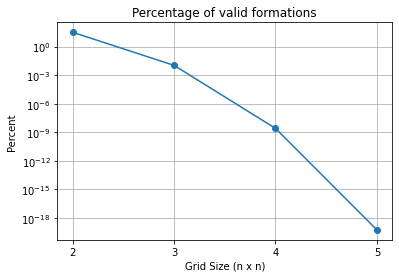

33.33333333333333
0.011022927689594356
2.6382714874778366e-09
5.575322605935693e-20


In [3]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
grid_sizes = range(2, 6)  # Grid sizes from 2x2 to 5x5
percentage = [formation(n)/math.factorial(n**2)*100 for n in grid_sizes]
plt.semilogy(grid_sizes, percentage, marker='o')
plt.title('Percentage of valid formations')
plt.xlabel('Grid Size (n x n)')
plt.xticks(grid_sizes)
plt.ylabel('Percent')
plt.grid(True)
plt.show()
for n in range(0,4):
    print(percentage[n])